<a href="https://colab.research.google.com/github/michaellee8/memcachetest/blob/master/memcachetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/michaellee8/memcachetest.git

fatal: destination path 'memcachetest' already exists and is not an empty directory.


In [0]:
import os
import pandas
data = {}

In [0]:
for filename in os.listdir("memcachetest"):
    if filename[-4:] == ".csv":
        df = pandas.read_csv("memcachetest/"+filename, index_col=[0])
        df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
        data[filename[:-4]] = df


In [0]:
import matplotlib.pyplot as plt

In [35]:
data[list(data.keys())[1]].iloc[0:3]

,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072,262144
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,3.064,2.733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def draw(df):
    x_axis = df.columns
    for row in df:
        index = row.index
        y_axis = row
        plt.xscale('log')
        plt.plot(y_axis, x_axis)

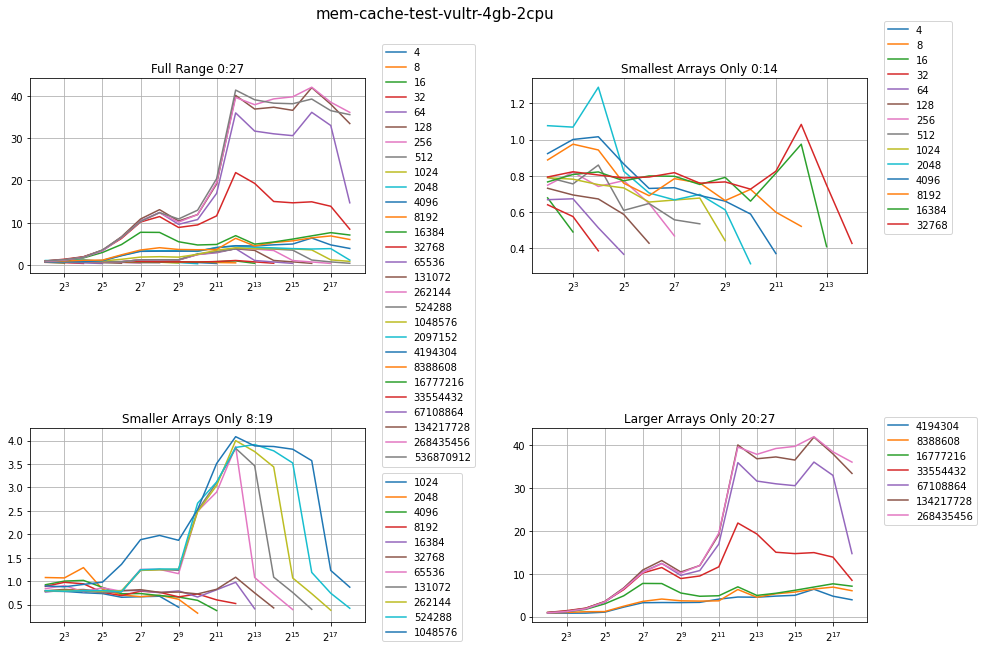

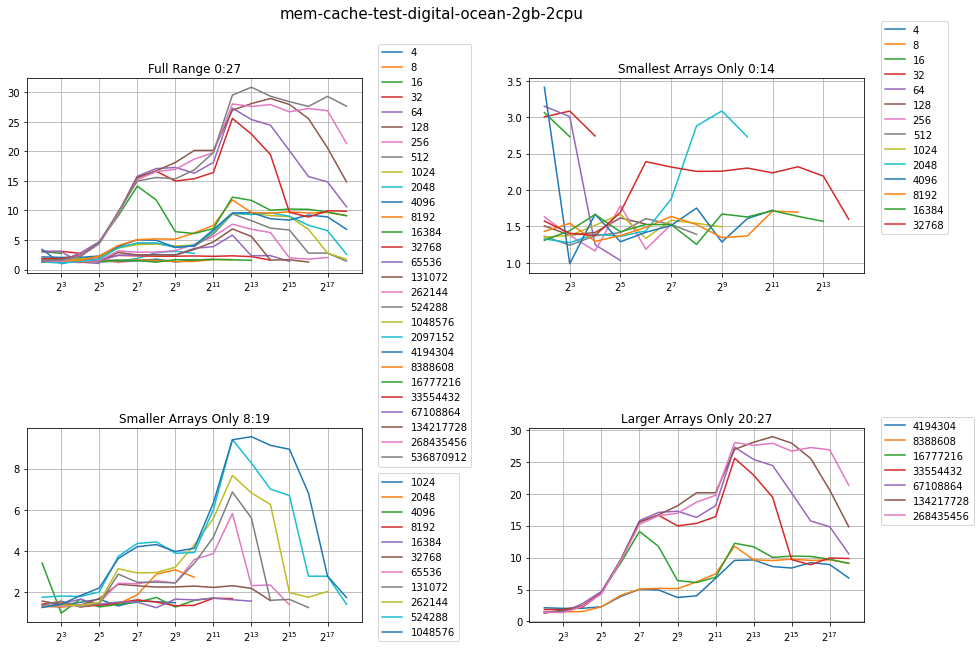

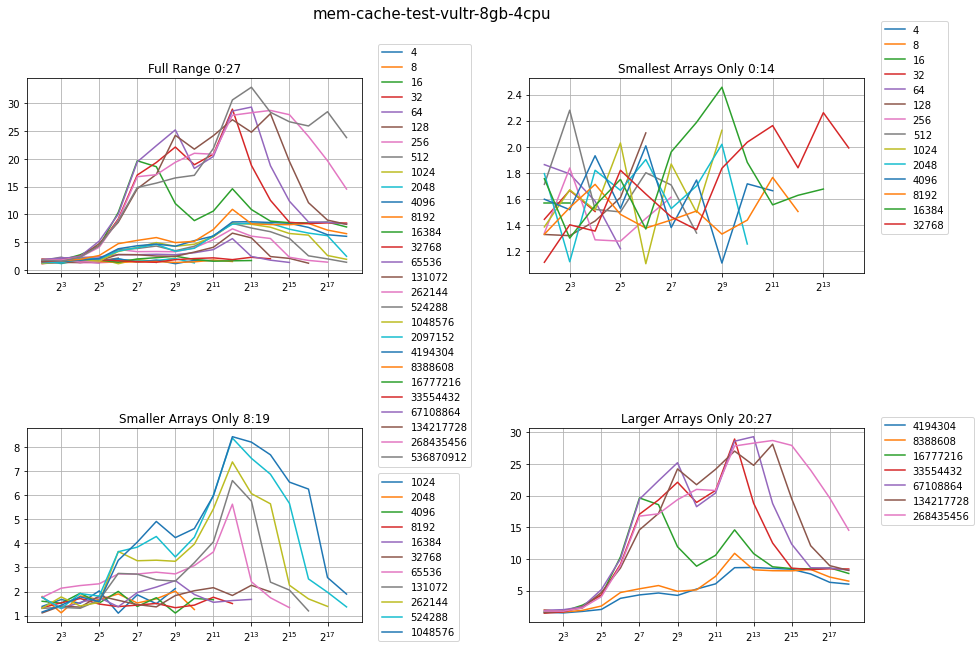

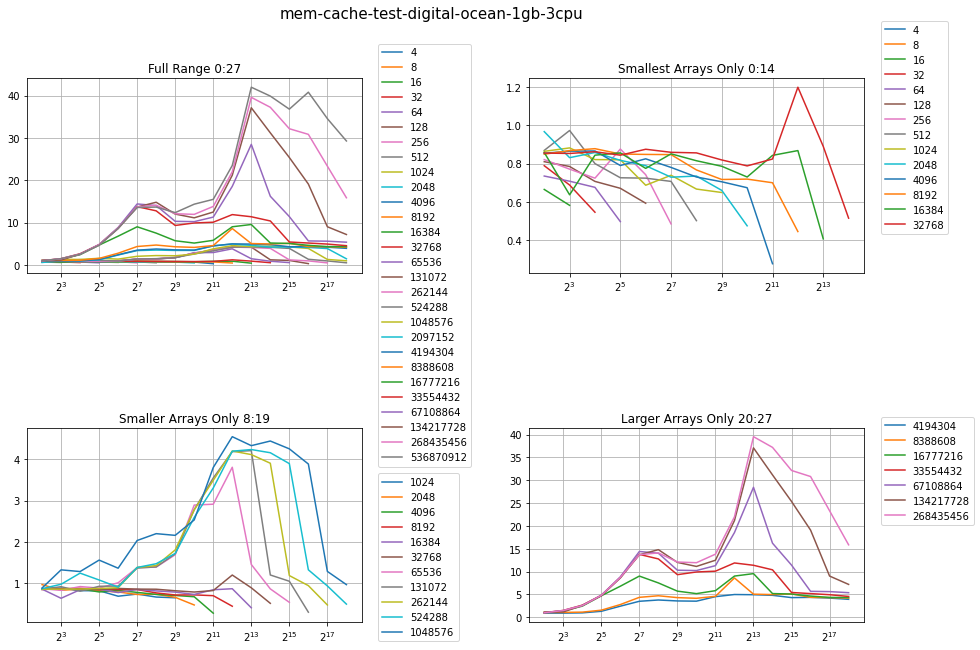

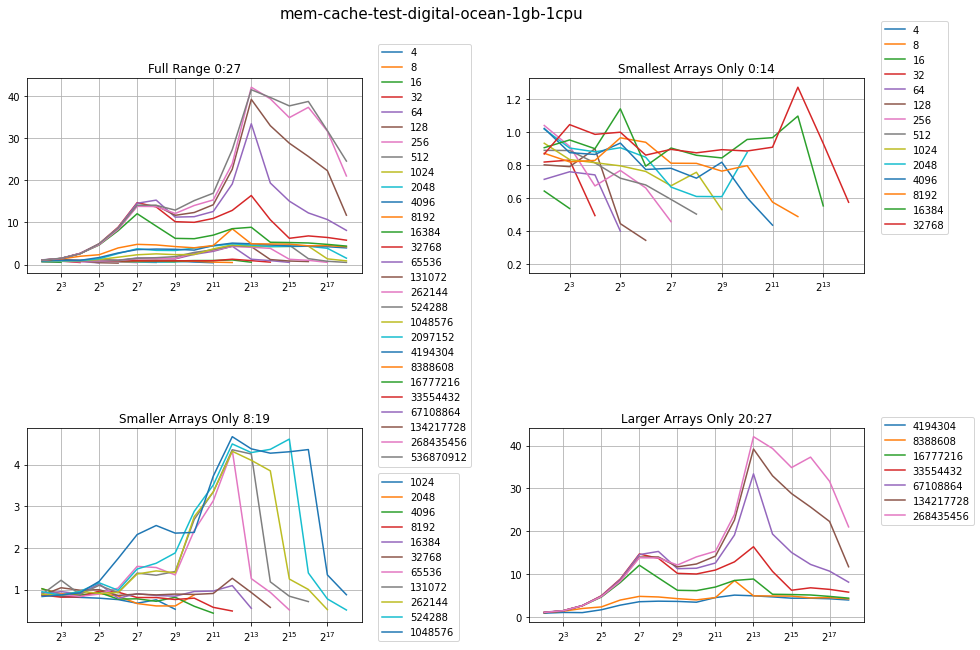

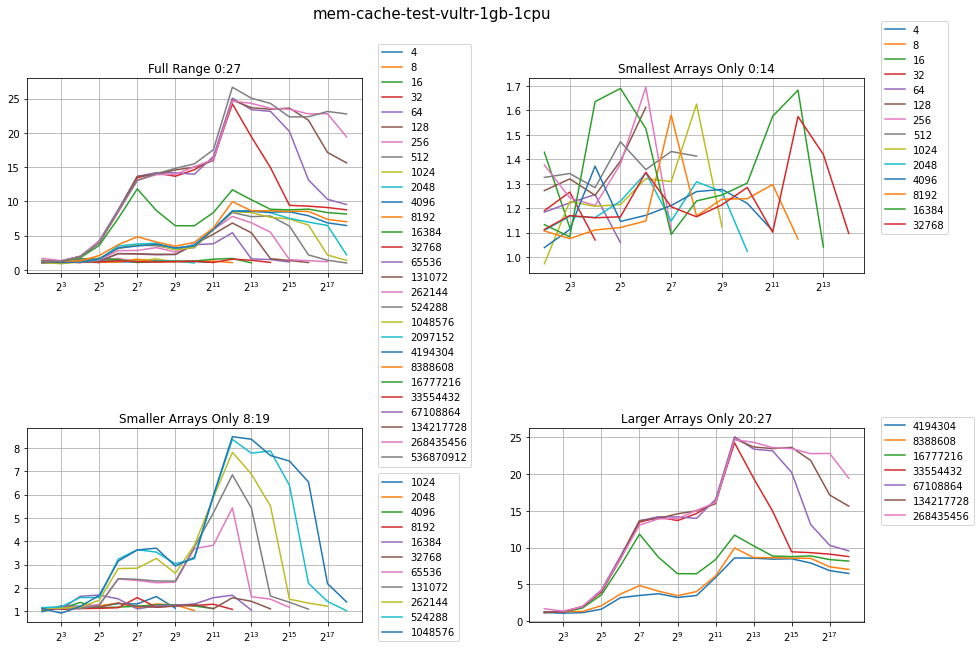

In [93]:
# legend_x, legend_y = 1.05, 0.2
for name, df in data.items():
    # x_axis = [int(name) for name in df.columns]
    # print(x_axis)
    plt.figure(figsize=(15,10))
    plt.suptitle(name, fontsize=15)
    plt.subplots_adjust(wspace=0.5, hspace=0.8)

    plt.subplot(221)
    plt.title("Full Range 0:27")
    for row_name in df.index.values:
        plt.xscale('log', basex=2)
        plt.plot(x_axis, df.loc[row_name, :], label = row_name)
    plt.legend(loc=(1.05, -1.0))
    plt.grid()


    plt.subplot(222)
    plt.title("Smallest Arrays Only 0:14")
    for row_name in df.iloc[0:14].index.values:
        plt.xscale('log', basex=2)
        plt.plot(x_axis, df.iloc[0:14].loc[row_name, :], label = row_name)
    plt.legend(loc=(1.05, 0.2))
    plt.grid()

    plt.subplot(223)
    plt.title("Smaller Arrays Only 8:19")
    for row_name in df.iloc[8:19].index.values:
        plt.xscale('log', basex=2)
        plt.plot(x_axis, df.iloc[8:19].loc[row_name, :], label = row_name)
    plt.legend(loc=(1.05, -0.1))
    plt.grid()

    plt.subplot(224)
    plt.title("Larger Arrays Only 20:27")
    for row_name in df.iloc[20:27].index.values:
        plt.xscale('log', basex=2)
        plt.plot(x_axis, df.iloc[20:27].loc[row_name, :], label = row_name)
    plt.legend(loc=(1.05, 0.5))
    plt.grid()

    plt.show()

    # break